<a href="https://colab.research.google.com/github/shRiyas02/Cancer-Detection-ML-/blob/main/Logostic_Regression_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To predict Telecom customer churn using Logistic Regression and K-Nearest Neighbors (KNN) classifiers based on the provided dataset

## Dataset Description: churn.csv
You are provided with a dataset containing various features related to Telecom customers, along with the target
variable 'Churn', which indicates whether a customer has churned (Yes) or not (No).

## Data Preprocessing:

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-v0_8-dark')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings; warnings.filterwarnings('ignore')

from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


In [7]:
# Importing data

df = pd.read_csv('churn.csv')
df.head ()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# no need for CustID column,hence dropping it in existing data
df.drop("customerID",axis = 1, inplace=True )
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Checking for missing values

df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [10]:
numeric_column = pd.to_numeric(df['TotalCharges'], errors='coerce')
rows_with_text = df[numeric_column.isnull()]

In [11]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
#converting Object data type into binary format

#droppping columns with integer before converting
column = df.columns.drop (['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])

#convert to binary
df_tel= pd.get_dummies(df, columns= column, drop_first = True, dtype = 'float')

In [13]:
df_tel.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.5,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## splitting the data

In [14]:
#grouping churn values together and creating percent

df_tel.groupby (["Churn_Yes"]).count ()/df.shape [0]*100

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn_Yes,,,,,,,,,,,,,,,,,,,,,
0.0,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,...,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013,73.463013
1.0,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,...,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987,26.536987


In [15]:
# splitting the dataset into target (churn) and independent variables
df_tel = df_tel[df_tel['TotalCharges'] != ' '] # the blank entry in the data removed but can also be imputed

Target = df_tel ["Churn_Yes"]
Variable = df_tel.drop (["Churn_Yes"], axis =1)

In [16]:
Variable.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   object 
 4   gender_Male                            7032 non-null   float64
 5   Partner_Yes                            7032 non-null   float64
 6   Dependents_Yes                         7032 non-null   float64
 7   PhoneService_Yes                       7032 non-null   float64
 8   MultipleLines_No phone service         7032 non-null   float64
 9   MultipleLines_Yes                      7032 non-null   float64
 10  InternetService_Fiber optic            7032 non-null   float64
 11  InternetS

In [17]:
#Finding the accuracies on different random states during train test splittingsince the dataset is quite small and different samples can lead to significantly different accuracy scores:
accuracy_scores = []
seeds = range(0,101)

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(Variable, Target, test_size=0.2, random_state=seed)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    logit_Score = accuracy_score(y_test, prediction)
    accuracy_scores.append(logit_Score)

The random state for max accuracy: 9


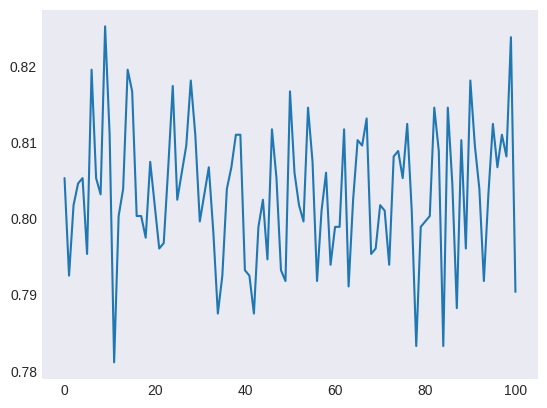

In [18]:
plt.plot(accuracy_scores)
print(f'The random state for max accuracy: {accuracy_scores.index(max(accuracy_scores))}')

# Splitting the data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Variable, Target, test_size=0.2, random_state= 99)

# Fitting the data on the logistic regression model:

In [20]:
LR = LogisticRegression()
LR.fit (X_train, y_train)
y_predict = LR.predict(X_test)

In [21]:
# Confusion matrix prediction

mat = metrics.confusion_matrix (y_test, y_predict, labels = [1,0])
mat

array([[206, 159],
       [ 89, 953]])

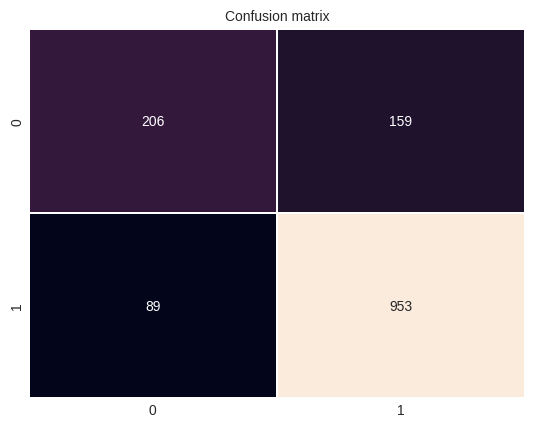

In [23]:
#Plotting confusion matrix:
sns.heatmap(mat, annot= True, fmt ='d', cbar= False, linewidths = 0.1)
plt.xticks (fontsize = 10), plt.yticks (fontsize = 10)
plt.title("Confusion matrix", fontsize =10)
plt.show ()
